In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/Forest Fire Dataset-20230127T042825Z-001.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [82]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')



In [2]:
#train generator 
train_d=ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              validation_split=0.3,
                              horizontal_flip=True)

In [3]:
train_data=train_d.flow_from_directory("/content/Forest Fire Dataset/fire_dataset",
                                       batch_size=32,
                                       target_size=(256,256),
                                       subset="training",
                                       class_mode="binary",
                                      )

Found 700 images belonging to 2 classes.


In [4]:
val_data=train_d.flow_from_directory("/content/Forest Fire Dataset/fire_dataset",
                                            target_size=(256,256),
                                            batch_size=32,
                                            class_mode="binary",
                                            subset="validation"
                                                )

Found 299 images belonging to 2 classes.


In [111]:
train_data.class_indices

{'fire_images': 0, 'non_fire_images': 1}

In [112]:
t_img,label=train_data.next()

In [113]:
label.shape

(32,)

In [114]:
t_img.shape

(32, 256, 256, 3)

In [115]:
t_img

array([[[[0.07146607, 0.00872098, 0.01264254],
         [0.07532042, 0.01257533, 0.01649689],
         [0.07843138, 0.01568628, 0.01960784],
         ...,
         [0.0509804 , 0.01960784, 0.01176471],
         [0.04756842, 0.01619587, 0.00835273],
         [0.04705883, 0.01568628, 0.00784314]],

        [[0.0714649 , 0.0087198 , 0.01264136],
         [0.07531925, 0.01257415, 0.01649572],
         [0.07843138, 0.01568628, 0.01960784],
         ...,
         [0.0509804 , 0.01960784, 0.01176471],
         [0.0475696 , 0.01619705, 0.00835391],
         [0.04705883, 0.01568628, 0.00784314]],

        [[0.07146372, 0.00871862, 0.01264018],
         [0.07531807, 0.01257297, 0.01649453],
         [0.07843138, 0.01568628, 0.01960784],
         ...,
         [0.0509804 , 0.01960784, 0.01176471],
         [0.04757078, 0.01619823, 0.00835509],
         [0.04705883, 0.01568628, 0.00784314]],

        ...,

        [[0.05040122, 0.0151071 , 0.01902867],
         [0.04705883, 0.01227666, 0.01466237]

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plotimage(img_arr,label):
    """
    input:image array
    output:plot image
    """
    for idx,img in enumerate(img_arr):
        if idx<=10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()
    

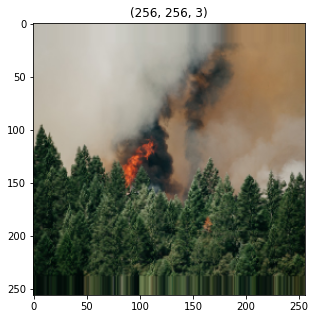

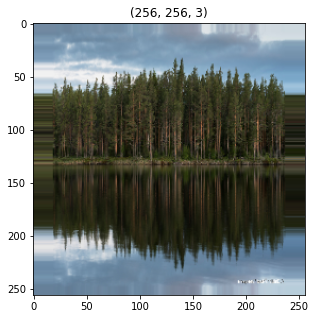

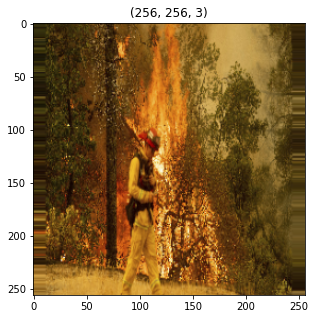

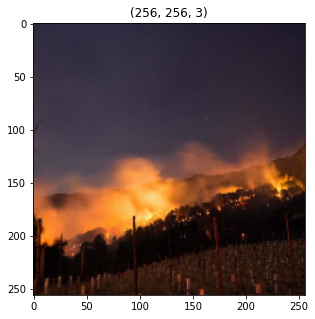

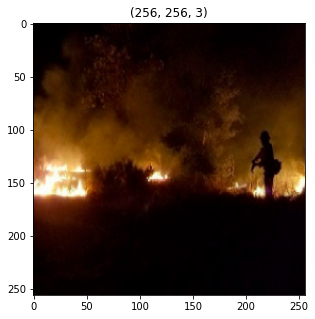

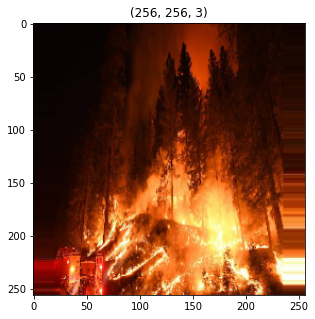

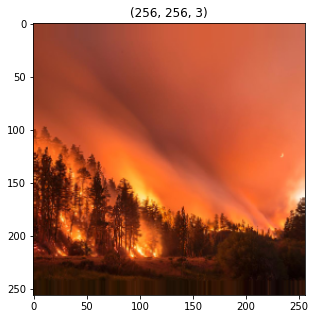

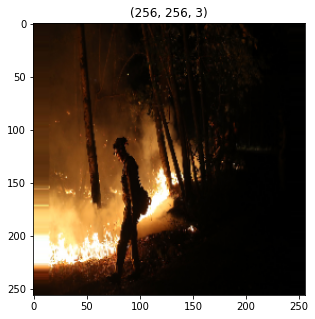

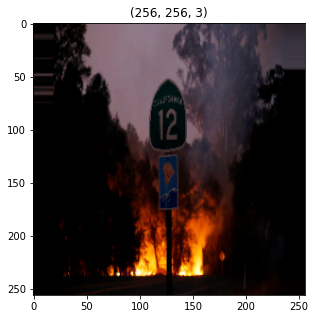

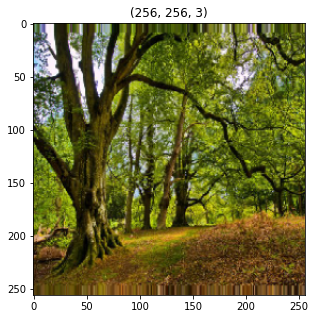

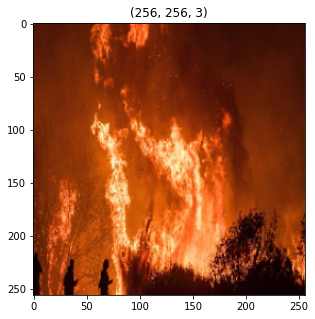

In [15]:
plotimage(t_img,label)

In [5]:
from keras import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D,Dense,Flatten,Activation,BatchNormalization,Dropout
from keras.models import Model


In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [8]:
earlystop = EarlyStopping(patience=10,monitor='val_loss')

In [9]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [10]:
callbacks = [earlystop, learning_rate_reduction]

In [11]:
history = model.fit(train_data, epochs=25,validation_data=val_data,validation_steps=1,callbacks=callbacks)

Epoch 1/25
22/22 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.8100

22/22 [==============================] - 35s 1s/step - loss: 0.6595 - accuracy: 0.8100 - val_loss: 11.4694 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/25
22/22 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9314

22/22 [==============================] - 31s 1s/step - loss: 0.1973 - accuracy: 0.9314 - val_loss: 20.2287 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 3/25
22/22 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9300

22/22 [==============================] - 30s 1s/step - loss: 0.1788 - accuracy: 0.9300 - val_loss: 17.9387 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 4/25
22/22 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0.9700

22/22 [==============================] - 32s 1s/step - loss: 0.1052 - accuracy: 0.9700 - val_loss: 32.6748 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 5/25
22/22 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.9500

22/22 [==============================] - 30s 1s/step - loss: 0.1326 - accuracy: 0.9500 - val_loss: 12.9319 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 6/25
22/22 [==============================] - ETA: 0s - loss: 0.1772 - accuracy: 0.9386

22/22 [==============================] - 30s 1s/step - loss: 0.1772 - accuracy: 0.9386 - val_loss: 9.7203 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/25
22/22 [==============================] - ETA: 0s - loss: 0.1488 - accuracy: 0.9457

22/22 [==============================] - 31s 1s/step - loss: 0.1488 - accuracy: 0.9457 - val_loss: 0.8698 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 8/25
22/22 [==============================] - ETA: 0s - loss: 0.1210 - accuracy: 0.9629

22/22 [==============================] - 32s 1s/step - loss: 0.1210 - accuracy: 0.9629 - val_loss: 0.3516 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 9/25
22/22 [==============================] - ETA: 0s - loss: 0.1452 - accuracy: 0.9414

22/22 [==============================] - 30s 1s/step - loss: 0.1452 - accuracy: 0.9414 - val_loss: 0.6112 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 10/25
22/22 [==============================] - ETA: 0s - loss: 0.0929 - accuracy: 0.9700

22/22 [==============================] - 30s 1s/step - loss: 0.0929 - accuracy: 0.9700 - val_loss: 0.9311 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 11/25
22/22 [==============================] - ETA: 0s - loss: 0.0975 - accuracy: 0.9629

22/22 [==============================] - 30s 1s/step - loss: 0.0975 - accuracy: 0.9629 - val_loss: 0.7957 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 12/25
22/22 [==============================] - ETA: 0s - loss: 0.1298 - accuracy: 0.9543

22/22 [==============================] - 32s 1s/step - loss: 0.1298 - accuracy: 0.9543 - val_loss: 0.8208 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 13/25
22/22 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.9629

22/22 [==============================] - 30s 1s/step - loss: 0.1035 - accuracy: 0.9629 - val_loss: 1.1678 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 14/25
22/22 [==============================] - ETA: 0s - loss: 0.1240 - accuracy: 0.9557

22/22 [==============================] - 30s 1s/step - loss: 0.1240 - accuracy: 0.9557 - val_loss: 1.7346 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 15/25
22/22 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9543

22/22 [==============================] - 31s 1s/step - loss: 0.1270 - accuracy: 0.9543 - val_loss: 1.0532 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 16/25
22/22 [==============================] - ETA: 0s - loss: 0.1008 - accuracy: 0.9629

22/22 [==============================] - 38s 2s/step - loss: 0.1008 - accuracy: 0.9629 - val_loss: 1.9222 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 17/25
22/22 [==============================] - ETA: 0s - loss: 0.0956 - accuracy: 0.9671

22/22 [==============================] - 31s 1s/step - loss: 0.0956 - accuracy: 0.9671 - val_loss: 0.5514 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 18/25
22/22 [==============================] - ETA: 0s - loss: 0.0746 - accuracy: 0.9700

22/22 [==============================] - 37s 2s/step - loss: 0.0746 - accuracy: 0.9700 - val_loss: 0.2986 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 19/25
22/22 [==============================] - ETA: 0s - loss: 0.1095 - accuracy: 0.9600

22/22 [==============================] - 40s 2s/step - loss: 0.1095 - accuracy: 0.9600 - val_loss: 0.2746 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 20/25
22/22 [==============================] - ETA: 0s - loss: 0.0854 - accuracy: 0.9729

22/22 [==============================] - 42s 2s/step - loss: 0.0854 - accuracy: 0.9729 - val_loss: 0.6457 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 21/25
22/22 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9800

22/22 [==============================] - 36s 2s/step - loss: 0.0619 - accuracy: 0.9800 - val_loss: 0.4061 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 22/25
22/22 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9771

22/22 [==============================] - 33s 2s/step - loss: 0.0838 - accuracy: 0.9771 - val_loss: 0.3285 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 23/25
22/22 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9829

22/22 [==============================] - 34s 2s/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.1608 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 24/25
22/22 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9871

22/22 [==============================] - 31s 1s/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.3467 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 25/25
22/22 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9900

22/22 [==============================] - 34s 1s/step - loss: 0.0439 - accuracy: 0.9900 - val_loss: 0.4891 - val_accuracy: 0.9062 - lr: 0.0010


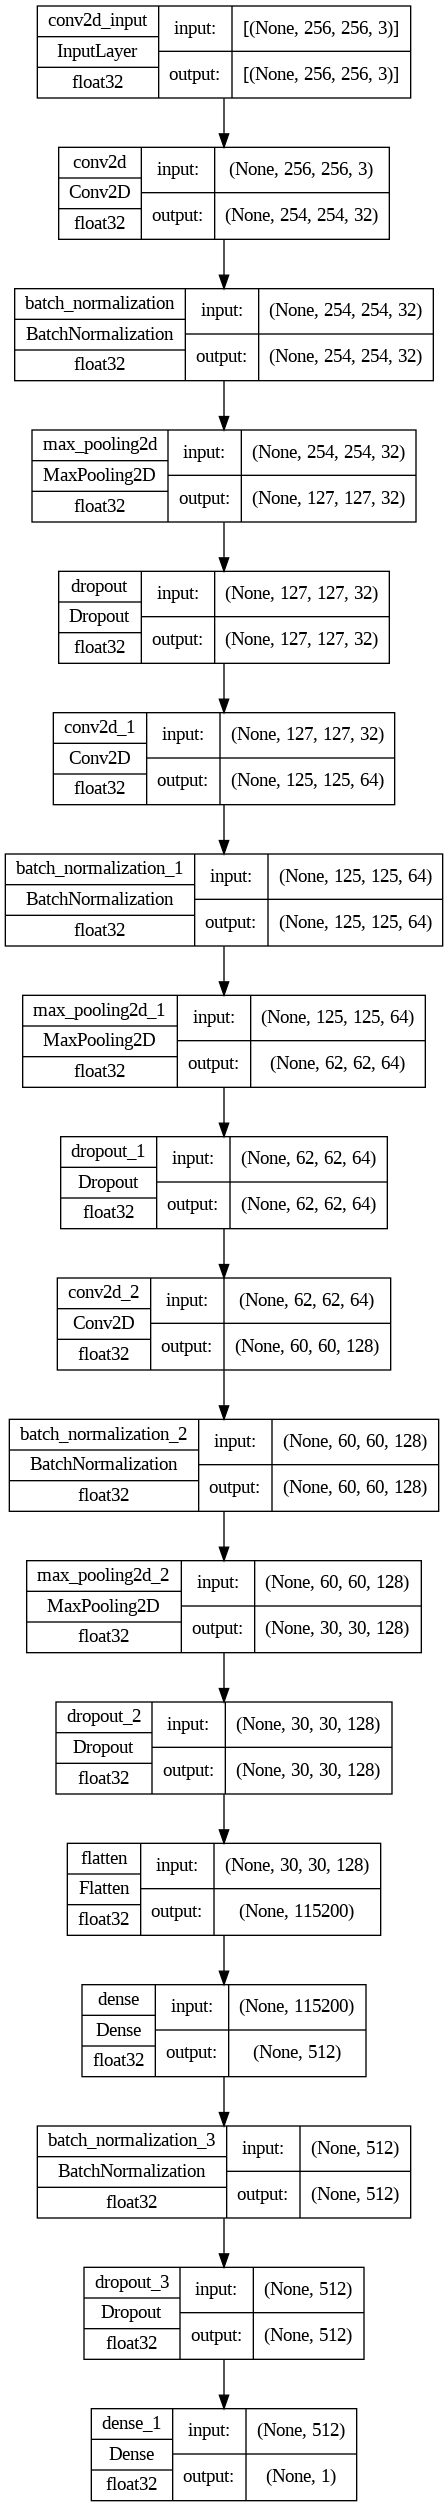

In [75]:
from keras.utils import plot_model
plot_model(model,to_file="model.png",show_layer_names=True,show_dtype=True,show_shapes=True)

In [76]:
Model_Results = model.evaluate(val_data)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

10/10 [==============================] - 8s 746ms/step - loss: 0.3538 - accuracy: 0.9097
LOSS:  0.3538
ACCURACY:  0.91


In [91]:
model.save_weights("model.h5")

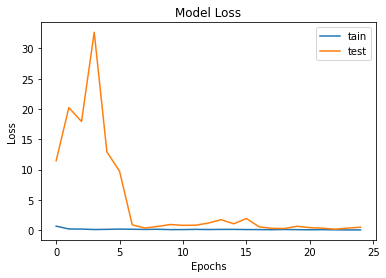

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['tain','test'])
plt.show()

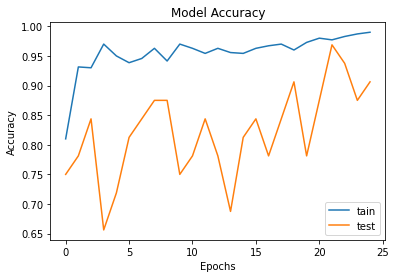

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['tain','test'])
plt.show()

In [58]:
predi=model.predict(val_data)
predi=predi.argmax(axis=-1)

10/10 [==============================] - 7s 730ms/step


In [ ]:
print(predi)

In [93]:
predictions= (model.predict(val_data) > 0.5).astype("int32")

10/10 [==============================] - 8s 680ms/step


In [64]:
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [65]:
train_data.class_indices

{'fire_images': 0, 'non_fire_images': 1}

In [66]:
from sklearn.metrics import confusion_matrix,classification_report

In [69]:
confusion_matrix(val_data.labels,predictions)

array([[188,  38],
       [ 58,  15]])

In [70]:
print(classification_report(val_data.labels,predictions))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       226
           1       0.28      0.21      0.24        73

    accuracy                           0.68       299
   macro avg       0.52      0.52      0.52       299
weighted avg       0.65      0.68      0.66       299



In [94]:
import cv2
import random

prediction for different source

In [97]:
val_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtyp

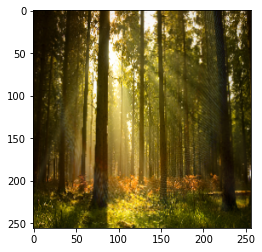


1/1 [==============================] - 0s 17ms/step

Predicting Non fire image


In [130]:
idx2=random.randint(0,len(label))
plt.imshow(t_img[idx2,:])
plt.show()
print()
y_pred=model.predict(t_img[idx2,:].reshape(1,256, 256, 3))
y_pred=y_pred>0.5
if y_pred==0:
  print("\nPredicting Fire image")
else:
  print('\nPredicting Non fire image')